1. Import relevant packages.
2. Load the dataset from tensorflow.
3. Familiarize yourself with the dataset.
4. Take a subset of the dataset (2000 training, 500 test).
5. Perform necessary reshaping of the dataset for the aforementioned classifiers.
6. Initialize models.
7. Fit models to training data.
8. Use the trained models to evaluate the test data.
9. For each classifier evaluate the performance by calculating the accuracy, recall and generating the confusion matrix inside your jupyter notebook.
10. Submit your jupyter notebook which includes all the results specified.

Step 1

In [5]:
import tensorflow as tf
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Step 2 and 3

4423680/4422102 [==============================] - 5s 1us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


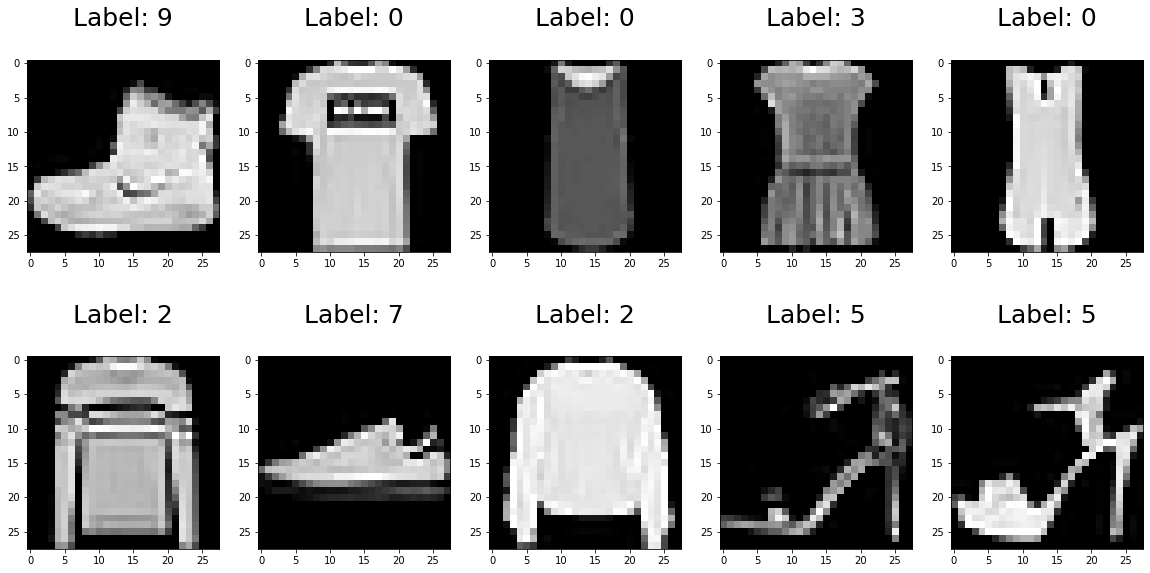

In [6]:
# https://www.tensorflow.org/tutorials/quickstart/beginner
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

plt.figure(figsize=(20, 10))
# https://www.programiz.com/python-programming/methods/built-in/zip
for index, (image, label) in enumerate(zip(x_train[0:10], y_train[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap='gray')
    plt.title('Label: %i\n' % label, fontsize=25)
    


Step 4 and 5

(2000, 28, 28)
(2000,)
(500, 28, 28)
(500,)
(2000, 784)


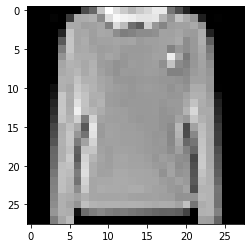

(500, 784)


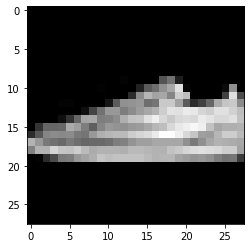

In [7]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train_tmp, x_test_tmp, y_train_tmp, y_test_tmp = train_test_split(x_train, y_train, train_size=(2/60), random_state=0)
x_train_sub, y_train_sub = x_train_tmp, y_train_tmp
print(x_train_sub.shape)
print(y_train_sub.shape)

x_train_tmp, x_test_tmp, y_train_tmp, y_test_tmp = train_test_split(x_test, y_test, test_size=(5/100), random_state=0)
x_test_sub, y_test_sub = x_test_tmp, y_test_tmp
print(x_test_sub.shape)
print(y_test_sub.shape)

x_train_sub = x_train_sub.transpose(0,1,2).reshape(2000,-1)
print(x_train_sub.shape)
plt.imshow(np.reshape(x_train_sub[0], (28, 28)), cmap = 'gray', vmin = 0, vmax = 255)
plt.show()
# https://stackoverflow.com/questions/32838802/numpy-with-python-convert-3d-array-to-2d
x_test_sub = x_test_sub.transpose(0,1,2).reshape(500,-1)
print(x_test_sub.shape)
plt.imshow(np.reshape(x_test_sub[0], (28, 28)), cmap = 'gray', vmin = 0, vmax = 255)

plt.show()


Step 6, 7 and 8

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# Initialize the KNN model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train_sub, y_train_sub)
knn_result = model.predict(x_test_sub)


In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# Initialize the SGD model
model = SGDClassifier(max_iter=250)
model.fit(x_train_sub, y_train_sub)
sgd_result = model.predict(x_test_sub)


In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Initialize the DT model
model = DecisionTreeClassifier()
model.fit(x_train_sub, y_train_sub)
dt_result = model.predict(x_test_sub)


Step 9

In [11]:
print('\nKNN\n')
print(classification_report(y_test_sub, knn_result))
print('KNN confusion matrix:\n')
print(metrics.confusion_matrix(y_test_sub, knn_result))


KNN

              precision    recall  f1-score   support

           0       0.64      0.79      0.70        47
           1       0.87      0.98      0.92        48
           2       0.53      0.81      0.64        43
           3       0.96      0.72      0.82        67
           4       0.69      0.50      0.58        50
           5       0.94      0.62      0.74        52
           6       0.38      0.39      0.38        44
           7       0.83      0.93      0.88        46
           8       0.98      0.79      0.88        53
           9       0.81      1.00      0.89        50

    accuracy                           0.75       500
   macro avg       0.76      0.75      0.74       500
weighted avg       0.78      0.75      0.75       500

KNN confusion matrix:

[[37  1  2  1  0  0  6  0  0  0]
 [ 0 47  0  0  0  0  1  0  0  0]
 [ 0  0 35  0  4  0  4  0  0  0]
 [ 7  5  2 48  3  0  2  0  0  0]
 [ 0  1 12  0 25  0 12  0  0  0]
 [ 1  0  0  0  0 32  2  8  0  9]
 [11  0 12  0 

In [12]:
print('\nSGD\n')
print(classification_report(y_test_sub, sgd_result))
print('SGD confusion matrix:\n')
print(metrics.confusion_matrix(y_test_sub, sgd_result))


SGD

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        47
           1       0.96      0.94      0.95        48
           2       0.59      0.93      0.72        43
           3       0.92      0.81      0.86        67
           4       0.74      0.56      0.64        50
           5       0.90      0.69      0.78        52
           6       0.52      0.34      0.41        44
           7       0.84      0.93      0.89        46
           8       0.89      0.91      0.90        53
           9       0.86      0.96      0.91        50

    accuracy                           0.79       500
   macro avg       0.79      0.79      0.78       500
weighted avg       0.80      0.79      0.79       500

SGD confusion matrix:

[[39  0  2  1  0  0  5  0  0  0]
 [ 1 45  1  1  0  0  0  0  0  0]
 [ 0  0 40  0  2  0  0  0  1  0]
 [ 4  2  2 54  1  1  1  0  1  1]
 [ 1  0 12  1 28  0  8  0  0  0]
 [ 0  0  1  0  0 36  0  7  3  5]
 [11  0 10  1 

In [13]:
print('\nDT\n')
print(classification_report(y_test_sub, dt_result))
print('DT confusion matrix:\n')
print(metrics.confusion_matrix(y_test_sub, dt_result))


DT

              precision    recall  f1-score   support

           0       0.67      0.62      0.64        47
           1       0.91      0.81      0.86        48
           2       0.49      0.67      0.57        43
           3       0.78      0.70      0.74        67
           4       0.59      0.52      0.55        50
           5       0.83      0.77      0.80        52
           6       0.22      0.27      0.24        44
           7       0.80      0.80      0.80        46
           8       0.81      0.79      0.80        53
           9       0.86      0.88      0.87        50

    accuracy                           0.69       500
   macro avg       0.70      0.68      0.69       500
weighted avg       0.71      0.69      0.70       500

DT confusion matrix:

[[29  0  1  3  2  0 11  0  1  0]
 [ 0 39  1  5  1  0  2  0  0  0]
 [ 0  1 29  1  7  0  5  0  0  0]
 [ 5  3  1 47  4  2  5  0  0  0]
 [ 0  0 11  1 26  0 12  0  0  0]
 [ 0  0  0  1  0 40  1  5  4  1]
 [ 8  0 16  2  2